# **SQL Case Study on Product dataset**

1. **About Dataset**
This dataset is a practical SQL case study designed for learners who are looking to enhance their SQL skills in analyzing sales, products, and marketing data. It contains several SQL queries related to a simulated business database for product sales, marketing expenses, and location data. The database consists of three main tables: Fact, Product, and Location.

2. **Objective of the Case Study:**
The purpose of this case study is to provide learners with a variety of practical SQL exercises that involve real-world business problems. The queries explore topics such as:

3. **Aggregating data (e.g., sum, count, average)**
Filtering and sorting data
Grouping and joining multiple tables
Using SQL functions like AVG(), COUNT(), SUM(), and MIN/MAX()
Handling advanced SQL features such as row numbering, transactions, and stored procedures

In [58]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sqlite3
import os
import re
from pandas.errors import ParserError
import matplotlib.pyplot as plt

In [2]:
folder_path = '/home/mis/Documents/SQL_Product_Casestudy'

# Get valid .csv files only (no lock/temp/jupyter/db files)

FILE_PATHS = [
    os.path.join(dirname, filename)
    for dirname, _, filenames in os.walk(folder_path)
    for filename in filenames
    if filename.lower().endswith('.csv') and
       not filename.startswith(('~', '.', '.~')) and
       not filename.endswith('#')
]


# Extract table names safely
table_names = [
    re.sub(r'\.csv$', '', os.path.basename(path), flags=re.IGNORECASE)
    .replace('.', '_').replace('#', '').replace('~', '').strip()
    for path in FILE_PATHS
]

In [3]:
# Connect to SQLite
conn = sqlite3.connect('product_casestudy.db')

failed_files = []

# Loop and try reading/writing each CSV
for idx, path in enumerate(FILE_PATHS):
    try:
        try:
            df = pd.read_csv(path, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(path, encoding='ISO-8859-1')

        df.to_sql(table_names[idx], conn, if_exists='replace', index=False)
        print(f"✅ Table {idx+1}: {table_names[idx]} created")

    except (ParserError, UnicodeDecodeError, pd.errors.EmptyDataError) as e:
        print(f"❌ Failed to load: {path} → {e}")
        failed_files.append((path, str(e)))

conn.close()

# Optional: Print failed file list
if failed_files:
    print("\n🚫 Failed Files:")
    for file, error in failed_files:
        print(f" - {file} → {error}")

✅ Table 1: fact created
✅ Table 2: Product created
✅ Table 3: Location created


This dataset contains SQL case study in analysing sales, products, and marketing data. It contains several SQL queries related to a simulated business database for product sales, marketing expenses, and location data. This database consists of three main tables: Fact, Product, and Location.

In [4]:
conn = sqlite3.connect('product_casestudy.db')
cursor = conn.cursor()

# List all tables
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
tables = cursor.fetchall()

print("📋 Tables in the database:")
for t in tables:
    print(f"- {t[0]}")

📋 Tables in the database:
- fact
- Product
- Location


In [5]:
df = pd.read_sql_query("""SELECT * FROM fact;""", conn)
print(df.head())

       Date  ProductId  Profit  Sales  Margin  COGS  Total Expenses  \
0  1/1/2010          1      94    219     130    89              36   
1  1/1/2010          2      68    190     107    83              39   
2  1/1/2010          3     101    234     139    95              38   
3  1/1/2010         13      30    100      56    44              26   
4  1/1/2010          5      54    134      80    54              26   

   Marketing  Inventory  Budget Profit  Budget COGS  Budget Margin  \
0         24        777            100           90            130   
1         27        623             80           80            110   
2         26        821            110          100            140   
3         14        623             30           30             50   
4         15        456             70           60             90   

   Budget Sales  Area Code  
0           220        719  
1           190        970  
2           240        970  
3            80        303  
4      

In [6]:
df = pd.read_sql_query("""SELECT * FROM Product;""", conn)
print(df.head())

   ProductId Product Type            Product     Type
0          1       Coffee           Amaretto  Regular
1          2       Coffee          Columbian  Regular
2          3       Coffee  Decaf Irish Cream    Decaf
3          4     Espresso        Caffe Latte  Regular
4          5     Espresso        Caffe Mocha  Regular


In [7]:
df = pd.read_sql_query("""SELECT * FROM Location;""", conn)
print(df.head())

   Area Code        State Market   Market Size
0        203  Connecticut   East  Small Market
1        206   Washington   West  Small Market
2        209   California   West  Major Market
3        210        Texas  South  Major Market
4        212     New York   East  Major Market


**Q1. Display the number of states present in the LocationTable.**

In [8]:
Q1 = pd.read_sql_query("""select Count (distinct state) AS number_of_states from location;""", conn)
print(Q1)

   number_of_states
0                20


**Q2. How many products are of regular type?**

In [9]:
Q2 = pd.read_sql_query("""Select Count(*) as count_ofregulartype from product where type = 'regular';""", conn)
print(Q2)

   count_ofregulartype
0                    0


**Q3. How much spending has been done on marketing of product ID 1?**

In [10]:
Q3 = pd.read_sql_query("""Select sum(marketing) as sum_of_marketing from fact where productid=1;""",conn)
print(Q3)

   sum_of_marketing
0              4658


**Q4. What is the minimum sales of a product?**

In [11]:
Q4 = pd.read_sql_query("""Select min (sales) as minimum_sales from fact;""", conn)
print(Q4)

   minimum_sales
0             17


**Q5. Display the max Cost of Good Sold (COGS)**

In [12]:
Q5 = pd.read_sql_query("""Select max (cogs) as max_cogs from fact;""", conn)
print(Q5)

   max_cogs
0       364


**Q6. Display the details of the product where product type is coffee.**

In [26]:
Q6 = pd.read_sql_query("""Select * from product where `Product Type` = 'Coffee';""", conn)
print(Q6)

   ProductId Product Type            Product     Type
0          1       Coffee           Amaretto  Regular
1          2       Coffee          Columbian  Regular
2          3       Coffee  Decaf Irish Cream    Decaf


**Q7. Display the details where total expenses are greater than 40.**

In [28]:
Q7 = pd.read_sql_query("""Select * from fact where `Total Expenses` >40;""",conn)
print(Q7)

           Date  ProductId  Profit  Sales  Margin  COGS  Total Expenses  \
0      1/1/2010          6      53    180     108    72              55   
1      1/1/2010          8      99    341     171   170              72   
2      1/1/2010          9       0    150      87    63              87   
3      1/1/2010         10      33    140      80    60              47   
4      1/1/2010         11      17    130      72    58              55   
...         ...        ...     ...    ...     ...   ...             ...   
2600  12/1/2011          8     156    308     174   115              69   
2601  12/1/2011          5      34    155      80    65              57   
2602  12/1/2011          6      76    188      96    80              45   
2603  12/1/2011          2      86    188     104    72              46   
2604  12/1/2011          3      30    266     145   105             125   

      Marketing  Inventory  Budget Profit  Budget COGS  Budget Margin  \
0            23        558

**Q8. What is the average sales in area code 719?**

In [30]:
Q8 = pd.read_sql_query("""Select Avg(sales) as AVg_sales from fact where `Area Code`=719;""",conn)
print(Q8)

    AVg_sales
0  186.583333


**Q9. Find out the total profit generated by Colorado state.**

In [31]:
Q9A = pd.read_sql_query("""
    SELECT SUM(Profit) AS PROFIT_SUM, state
    FROM fact
    JOIN location ON fact.`Area Code` = location.`Area Code`
    WHERE state = 'Colorado'
    GROUP BY state;
""", conn)

# Q9B
Q9B = pd.read_sql_query("""
    SELECT SUM(Profit) AS PROFIT_SUM
    FROM fact
    WHERE `Area Code` IN (
        SELECT `Area Code`
        FROM location
        WHERE state = 'Colorado'
    );
""", conn)

print(Q9A)
print(Q9B)

   PROFIT_SUM     State
0       17743  Colorado
   PROFIT_SUM
0       17743


**Q10. Display the average inventory for each product ID.**

In [33]:
Q10 = pd.read_sql_query("""Select avg(inventory)as avg_inventory, productid from fact 
group by productid order by productid asc;""", conn)
print(Q10)

    avg_inventory  ProductId
0      741.020833          1
1      707.550000          2
2      838.682292          3
3      255.990741          4
4      756.241667          5
5      755.205882          6
6      879.638889          7
7      712.645833          8
8      718.537500          9
9     1095.906250         10
10     737.833333         11
11     757.173611         12
12     900.375000         13


**Q11. Display state in a sequential order in a Location Table.**

In [34]:
Q11 = pd.read_sql_query("""Select State from location group by state order by state asc;""", conn)
print(Q11)

            State
0      California
1        Colorado
2     Connecticut
3         Florida
4        Illinois
5            Iowa
6       Louisiana
7   Massachusetts
8        Missouri
9          Nevada
10  New Hampshire
11     New Mexico
12       New York
13           Ohio
14       Oklahoma
15         Oregon
16          Texas
17           Utah
18     Washington
19      Wisconsin


**Q12. Display the average budget of the Product where the average budget margin should be greater than 100.**

In [38]:
Q12 = pd.read_sql_query("""Select productid, avg(`Budget Margin`) As Avg_Budget_Margin from fact  group by productid having avg(`Budget Margin`)>100;""", conn)
print(Q12)

   ProductId  Avg_Budget_Margin
0          2         173.208333
1          6         107.990196
2          7         182.222222
3          8         100.208333
4         12         103.680556


**Q13. What is the total sales done on date 2010-01-01?**

In [40]:
Q13 = pd.read_sql_query("""select sum(sales) from fact where date= '1/1/2010';""", conn)
print(Q13)

   sum(sales)
0       31555


**Q14. Display the average total expense of each product ID on an individual date.**

In [44]:
Q14 = pd.read_sql_query("""select avg(`Total Expenses`) AS avg_total_expenses, productid,date from fact 
group by productid, date 
order by productid, date;""", conn)
print(Q14)

     avg_total_expenses  ProductId       Date
0             46.125000          1   1/1/2010
1             48.500000          1   1/1/2011
2             47.250000          1  10/1/2010
3             47.250000          1  10/1/2011
4             46.750000          1  11/1/2010
..                  ...        ...        ...
307           42.750000         13   7/1/2011
308           46.333333         13   8/1/2010
309           43.166667         13   8/1/2011
310           47.166667         13   9/1/2010
311           47.166667         13   9/1/2011

[312 rows x 3 columns]


**15. Display the table with the following attributes such as date, productID, product_type, product, sales, profit, state, area_code.**

In [51]:
Q15 = pd.read_sql_query("""SELECT date, fact.productid, `Product Type`, product, sales, profit, state, fact.`Area Code` FROM fact
JOIN product ON fact.productid = product.productid
JOIN location  ON fact.`Area Code` = location.`Area Code`;""", conn)

print(Q15)

           Date  ProductId Product Type            Product  Sales  Profit  \
0      1/1/2010          1       Coffee           Amaretto    219      94   
1      1/1/2010          2       Coffee          Columbian    190      68   
2      1/1/2010          3       Coffee  Decaf Irish Cream    234     101   
3      1/1/2010         13          Tea          Green Tea    100      30   
4      1/1/2010          5     Espresso        Caffe Mocha    134      54   
...         ...        ...          ...                ...    ...     ...   
4243  12/1/2011          4     Espresso        Caffe Latte     60      19   
4244  12/1/2011          5     Espresso        Caffe Mocha    155      34   
4245  12/1/2011          6     Espresso     Decaf Espresso    188      76   
4246  12/1/2011          2       Coffee          Columbian    188      86   
4247  12/1/2011          3       Coffee  Decaf Irish Cream    266      30   

           State  Area Code  
0       Colorado        719  
1       Colorad

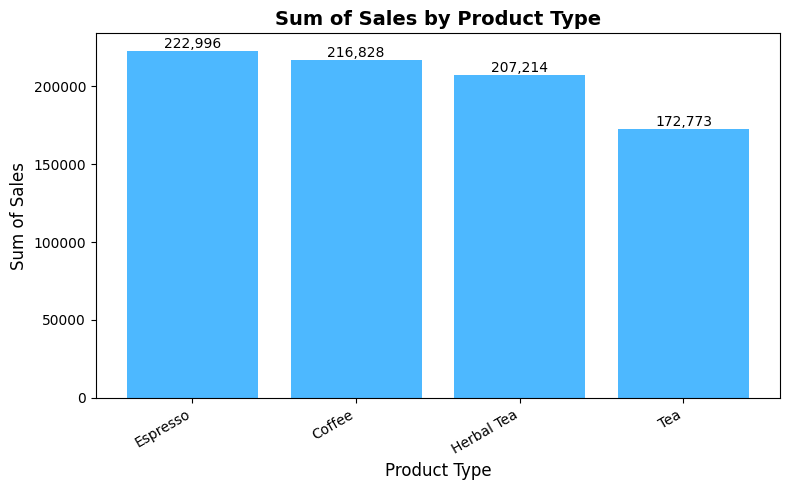

In [59]:

# Group and sort
sales_by_product_type = Q15.groupby('Product Type')['Sales'].sum().reset_index()
sales_by_product_type = sales_by_product_type.sort_values('Sales', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(sales_by_product_type['Product Type'], sales_by_product_type['Sales'], color='#4db8ff')

# Labels and title
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Sum of Sales', fontsize=12)
plt.title('Sum of Sales by Product Type', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

**Q16. Display the rank without any gap to show the sales wise rank.**

In [61]:
Q16 = pd.read_sql_query("""Select sales, row_number()over (order by sales desc) as rank from fact""", conn)
print(Q16)

      Sales  rank
0       912     1
1       912     2
2       910     3
3       910     4
4       904     5
...     ...   ...
4243     19  4244
4244     19  4245
4245     18  4246
4246     18  4247
4247     17  4248

[4248 rows x 2 columns]


**Q17. Find the state wise profit and sales.**

In [64]:
Q17 = pd.read_sql_query("""Select state, sum(profit) as total_profit, sum(sales) as total_sales from fact join 
	location on fact.`Area Code` = location.`Area Code`
	group by state""", conn)
print(Q17)

            State  total_profit  total_sales
0      California         31785        96892
1        Colorado         17743        48179
2     Connecticut          7621        25429
3         Florida         12310        37443
4        Illinois         30821        69883
5            Iowa         22212        54750
6       Louisiana          7355        23161
7   Massachusetts         16442        29965
8        Missouri          3601        24647
9          Nevada         10616        60159
10  New Hampshire          2748        14887
11     New Mexico           799        15892
12       New York         20096        70852
13           Ohio         10773        34517
14       Oklahoma          8558        27463
15         Oregon         12439        40899
16          Texas         15766        37410
17           Utah          7751        35384
18     Washington         11405        38930
19      Wisconsin          8702        33069


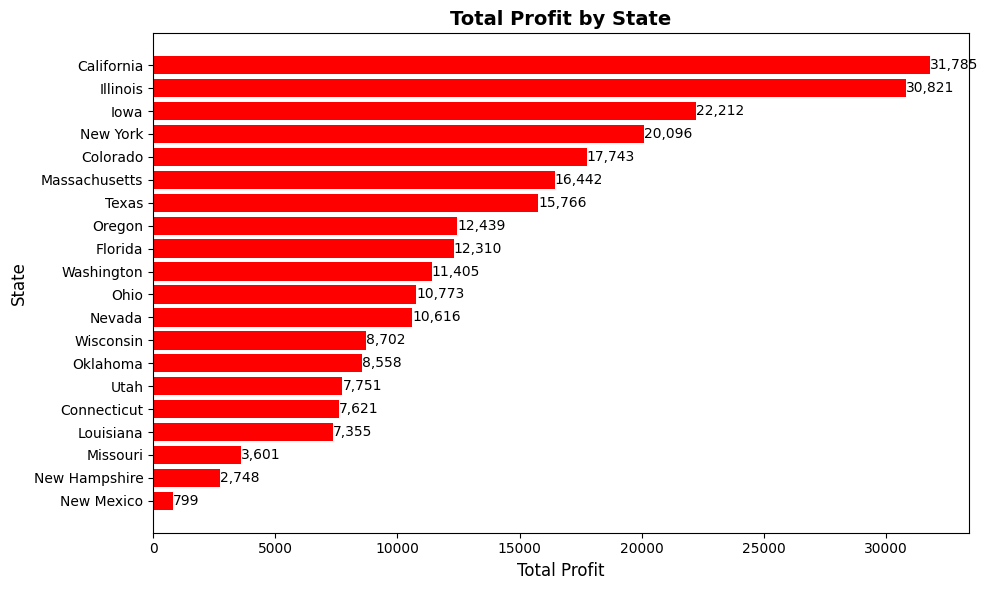

In [83]:
# Group and sort
profit_by_states = Q17.groupby('State')['total_profit'].sum().reset_index()
profit_by_states = profit_by_states.sort_values('total_profit', ascending=True)  # ascending for horizontal chart

# Plot Horizontal Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.barh(profit_by_states['State'], profit_by_states['total_profit'], color='red')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             va='center', ha='left', fontsize=10)

# Labels and title
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Total Profit by State', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


**Q18. Find the state wise profit and sales along with the productname.**

In [72]:
Q18 = pd.read_sql_query("""Select state, sum(profit) as sum_profit, sum(sales) as sum_sales, product from fact 
join location on fact.`Area Code` = location.`Area Code`
join product on fact.Productid = product.productid 
group by state, product""",conn)

print(Q18)

          State  sum_profit  sum_sales            Product
0    California       -2217       2714           Amaretto
1    California        4497      12001        Caffe Latte
2    California         886       7691        Caffe Mocha
3    California        3252       6233          Chamomile
4    California        8566      18245          Columbian
..          ...         ...        ...                ...
172   Wisconsin         916       2809         Darjeeling
173   Wisconsin         766       2193     Decaf Espresso
174   Wisconsin        1741       4887  Decaf Irish Cream
175   Wisconsin           1       3497          Earl Grey
176   Wisconsin        1338       2891              Lemon

[177 rows x 4 columns]


**Q19. If there is an increase in sales of 5%, calculate the increased sales.**

In [76]:
Q19 = pd.read_sql_query("""Select sales, sales*(0.05) as increased_sales, sales+sales*0.05 as increment from fact;""", conn)

print(Q19)

      Sales  increased_sales  increment
0       219            10.95     229.95
1       190             9.50     199.50
2       234            11.70     245.70
3       100             5.00     105.00
4       134             6.70     140.70
...     ...              ...        ...
4243     60             3.00      63.00
4244    155             7.75     162.75
4245    188             9.40     197.40
4246    188             9.40     197.40
4247    266            13.30     279.30

[4248 rows x 3 columns]


**Q20. Find the maximum profit along with the product ID and producttype.**

In [86]:
Q20 = pd.read_sql_query("""select max(f.profit) as 'max_profit', p.productid, p.`Product Type` from fact f
join product p on p.productid = f.productid
group by p.productid,p.`Product Type`""", conn)

print(Q20)

    max_profit  ProductId Product Type
0          199          1       Coffee
1          778          2       Coffee
2          207          3       Coffee
3          233          4     Espresso
4          362          5     Espresso
5          362          6     Espresso
6          646          7     Espresso
7          362          8   Herbal Tea
8          536          9   Herbal Tea
9          207         10   Herbal Tea
10         362         11          Tea
11         331         12          Tea
12         180         13          Tea


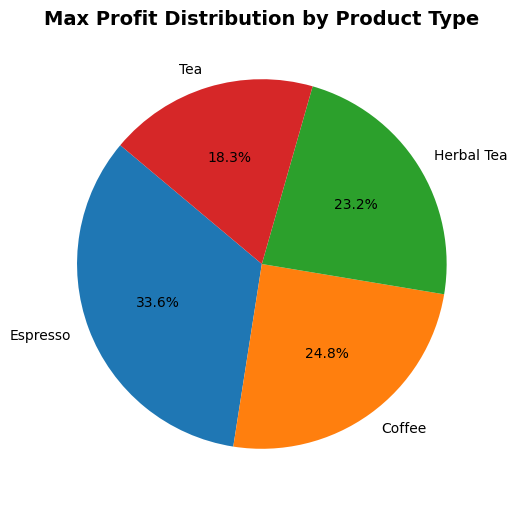

In [93]:
# Group and sort
max_profit_by_product_type = Q20.groupby('Product Type')['max_profit'].sum().reset_index()
max_profit_by_product_type = max_profit_by_product_type.sort_values('max_profit', ascending=False)

# Plot Pie Chart
plt.figure(figsize=(7, 6))
plt.pie(
    max_profit_by_product_type['max_profit'], 
    labels=max_profit_by_product_type['Product Type'], 
    autopct='%1.1f%%', 
    startangle=140
)

# Title
plt.title('Max Profit Distribution by Product Type', fontsize=14, fontweight='bold')

plt.show()


**Q21. Write a query by creating a condition in which if the total expenses is less than 60 then it is a profit or else loss.**

In [100]:
Q21 = pd.read_sql_query("""select fact.productid, product.product,`Total Expenses`, Case When `Total Expenses` < 60 Then 'profit'
                                                         ELSE 'loss'
                                                    End as result from fact
                            Left Join product On fact.productid = product.productid""", conn)

print(Q21)

      ProductId            Product  Total Expenses  result
0             1           Amaretto              36  profit
1             2          Columbian              39  profit
2             3  Decaf Irish Cream              38  profit
3            13          Green Tea              26  profit
4             5        Caffe Mocha              26  profit
...         ...                ...             ...     ...
4243          4        Caffe Latte              19  profit
4244          5        Caffe Mocha              57  profit
4245          6     Decaf Espresso              45  profit
4246          2          Columbian              46  profit
4247          3  Decaf Irish Cream             125    loss

[4248 rows x 4 columns]


<Axes: ylabel='count'>

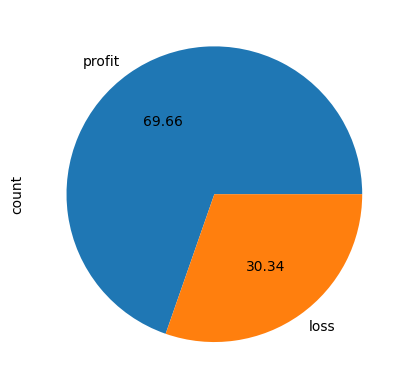

In [101]:
Q21.result.value_counts().plot(kind="pie",autopct="%0.2f")


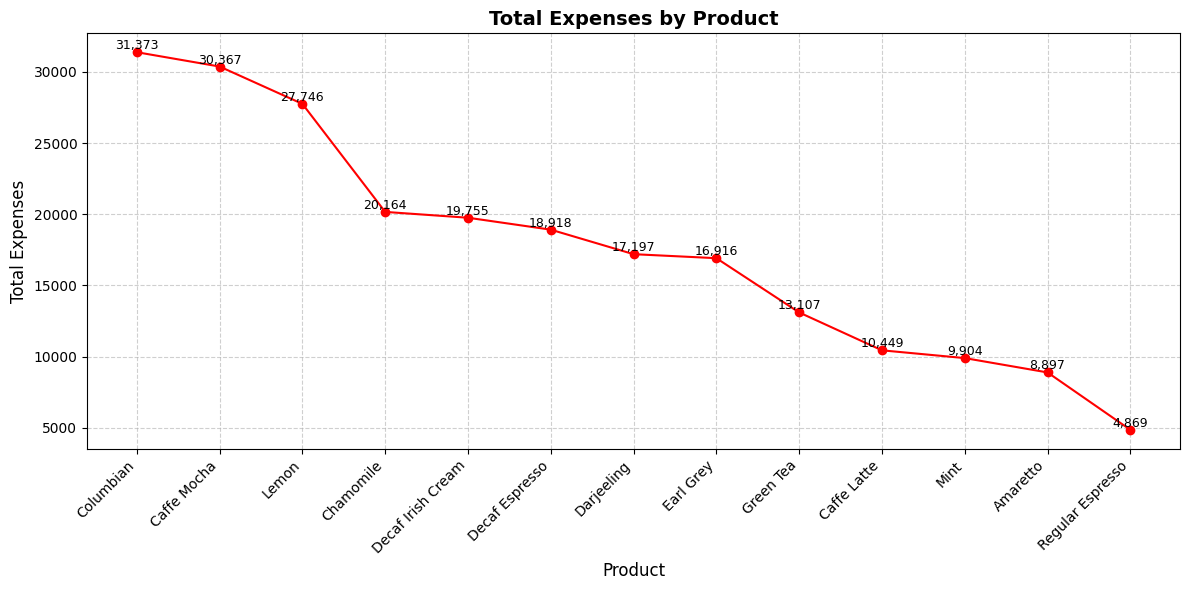

In [113]:
# Group and sort
result_product = Q21.groupby('Product')['Total Expenses'].sum().reset_index()
result_product = result_product.sort_values('Total Expenses', ascending=False)

# Plot Line Chart
plt.figure(figsize=(12, 6))  # Wider chart for better spacing
plt.plot(
    result_product['Product'], 
    result_product['Total Expenses'], 
    marker='o', 
    linestyle='-', 
    color='red'
)

# Labels and title
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Expenses', fontsize=12)
plt.title('Total Expenses by Product', fontsize=14, fontweight='bold')

# Show exact values above each point
for i, val in enumerate(result_product['Total Expenses']):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=9)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Grid and layout adjustments
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


**Q23. Give the total weekly sales value with the date and product ID details. Use roll-up to pull the data in hierarchical order.**

In [135]:
Q23 = pd.read_sql_query("""SELECT 
    strftime('%W', date) AS week,
    date,
    productid,
    SUM(sales) AS total_sales
FROM Fact
GROUP BY 
    strftime('%W', date),
    date,
    productid
ORDER BY week, date;
""", conn)
print(Q23)

     week      Date  ProductId  total_sales
0    None  1/1/2010          1         1082
1    None  1/1/2010          2         4860
2    None  1/1/2010          3         2372
3    None  1/1/2010          4         1478
4    None  1/1/2010          5         3220
..    ...       ...        ...          ...
307  None  9/1/2011          9         4036
308  None  9/1/2011         10         1434
309  None  9/1/2011         11         3208
310  None  9/1/2011         12         3005
311  None  9/1/2011         13         1394

[312 rows x 4 columns]


**Q24. Apply union and intersection operator on the tables which consist of attribute area code.**

In [127]:
Q24A = pd.read_sql_query("""select `Area Code` from fact union select `Area Code` from location;""", conn)
Q24B = pd.read_sql_query("""select `Area Code` from fact intersect select `Area Code` from location;""", conn)
print(Q24A)
print(Q24B)

     Area Code
0          203
1          206
2          209
3          210
4          212
..         ...
151        971
152        972
153        978
154        979
155        985

[156 rows x 1 columns]
     Area Code
0          203
1          206
2          209
3          210
4          212
..         ...
151        971
152        972
153        978
154        979
155        985

[156 rows x 1 columns]


**Q25. Display the date, product ID and sales where total expenses are between 100 to 200**

In [130]:
Q25 = pd.read_sql_query("""SELECT date, productid, sales FROM Fact WHERE `Total Expenses` BETWEEN 100 AND 200;""", conn)

print(Q25)

          Date  ProductId  Sales
0     1/1/2010          5    546
1     1/1/2010          8    546
2     1/1/2010         12    546
3     1/1/2010          2    190
4     1/1/2010          5    190
..         ...        ...    ...
434  12/1/2011         11    614
435  12/1/2011         13     33
436  12/1/2011          8    343
437  12/1/2011          9    569
438  12/1/2011          3    266

[439 rows x 3 columns]
